In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train = pd.read_csv('/Users/sunxun/Downloads/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('/Users/sunxun/Downloads/test_Y3wMUE5_7gLdaTN.csv')
train_original = train.copy()
test_original = test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape

(367, 12)

In [10]:
test.shape

(367, 12)

In [11]:
train.shape, test.shape

((614, 13), (367, 12))

In [12]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

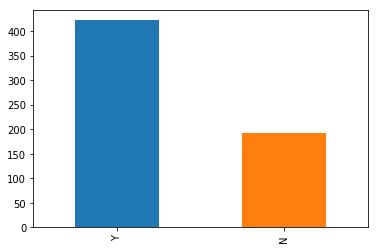

In [17]:
train['Loan_Status'].value_counts().plot.bar()

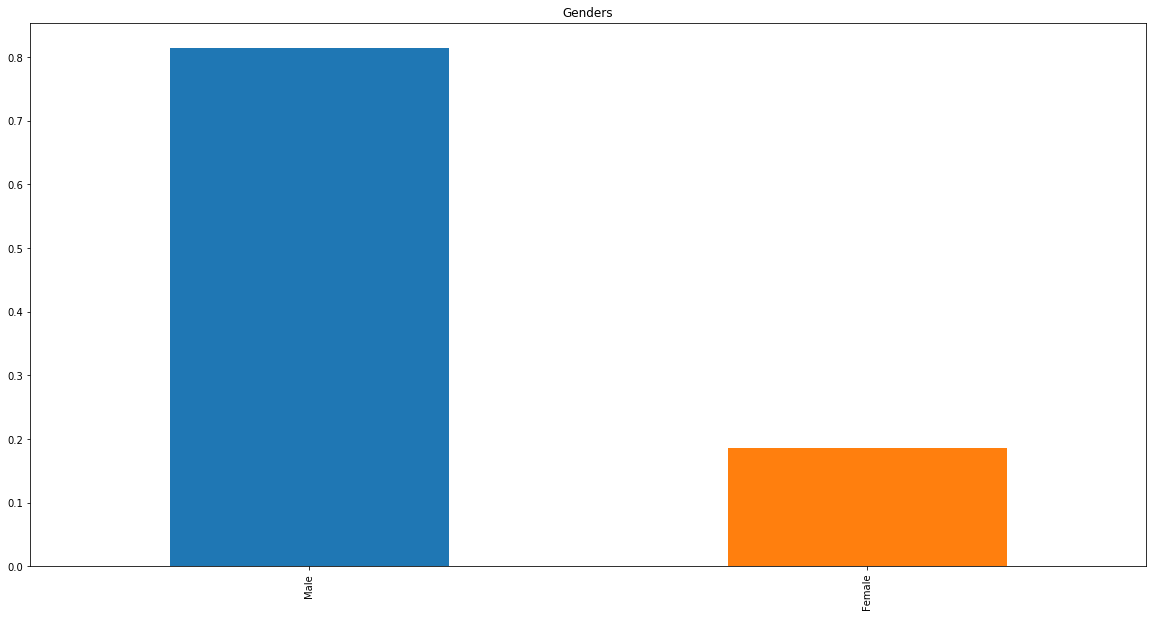

In [18]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Genders')

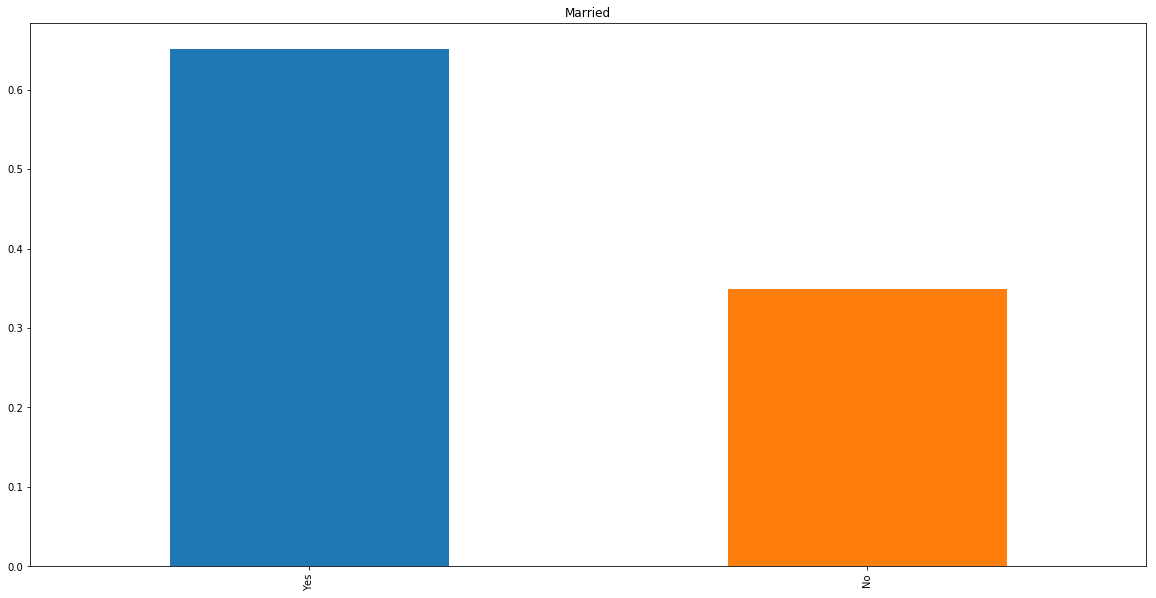

In [19]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')

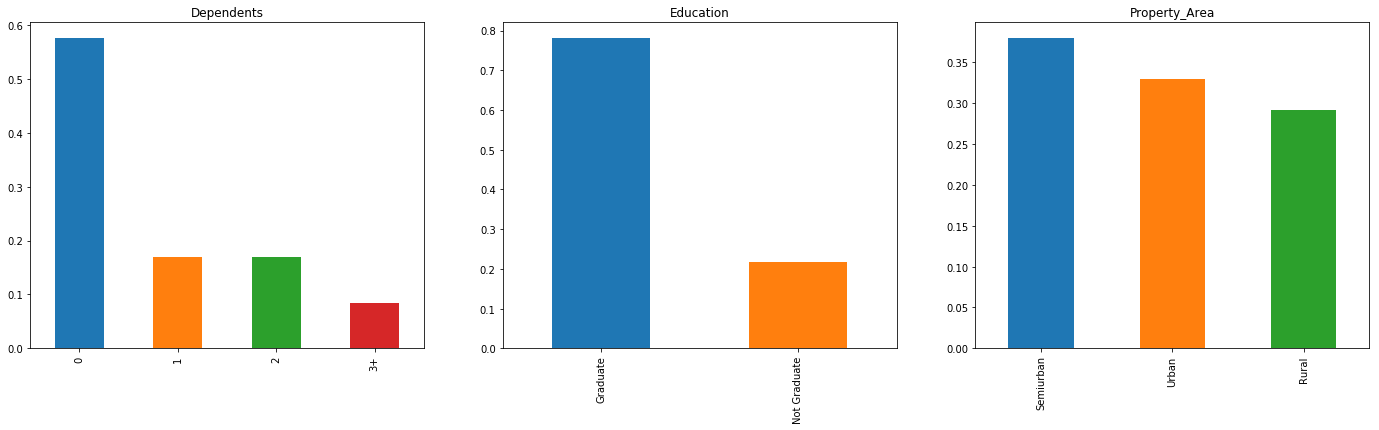

In [25]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

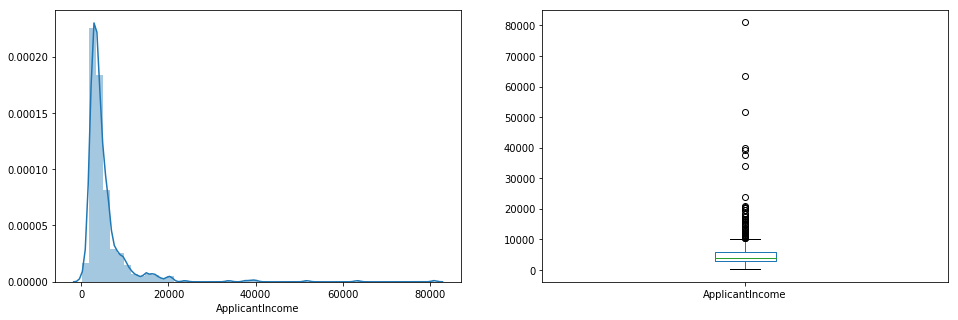

In [28]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

Text(0.5, 0.98, ' ')

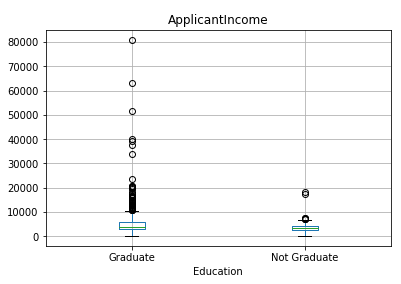

In [37]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle(" ")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


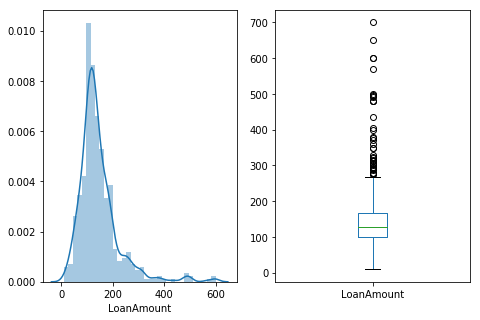

In [49]:
plt.figure(1) 
plt.subplot(141) 
df=train.dropna() 
sns.distplot(df['LoanAmount']);
plt.subplot(142)
train['LoanAmount'].plot.box(figsize=(16, 5))

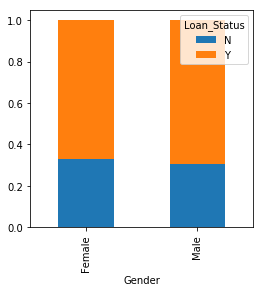

In [50]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4, 4))

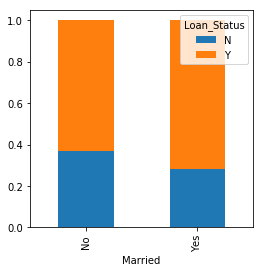

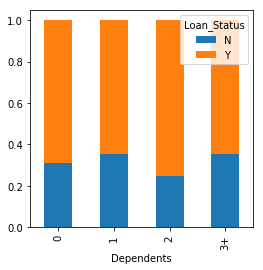

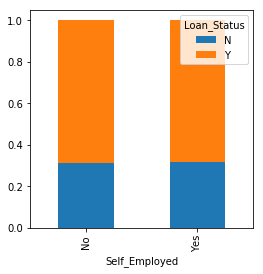

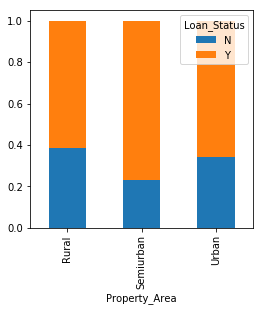

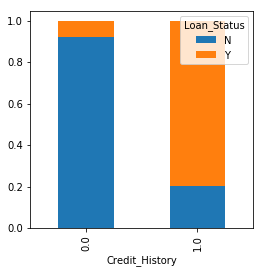

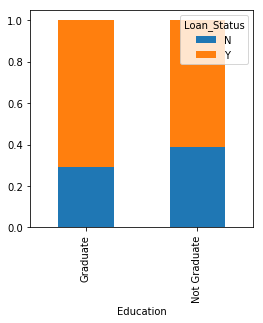

In [57]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True',figsize=(4,4))
plt.show()
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True',figsize=(4,4))
plt.show()
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True',figsize=(4,4))
plt.show()
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True',figsize=(4,4))
plt.show()
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

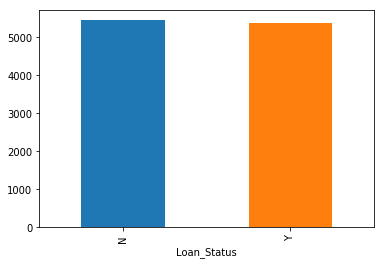

In [60]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Persentage')

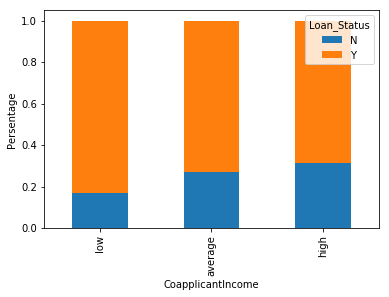

In [65]:
bins=[0, 1000, 3000, 42000]
group=['low', 'average', 'high']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Persentage')

Text(0, 0.5, 'Persentage')

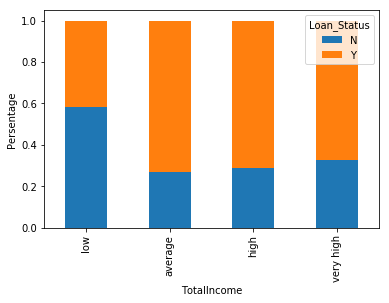

In [70]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0, 2500,4000,6000,81000]
group=['low','average','high','very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('TotalIncome')
plt.ylabel('Persentage')

Text(0, 0.5, 'Persentage')

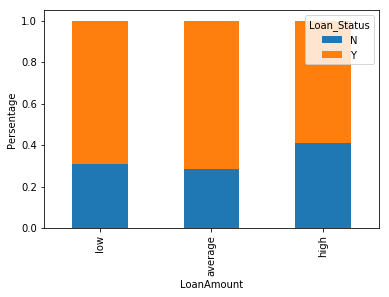

In [72]:
bins=[0,100,200,700]
group=['low','average','high']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Persentage')

In [74]:
train=train.drop(['Total_Income_bin','LoanAmount_bin','Total_Income','Total_Income_bin','Coapplicant_Income_bin'],axis=1)

In [79]:
train['Dependents'].replace('3+','3',inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
test['Dependents'].replace('3+','3',inplace=True)

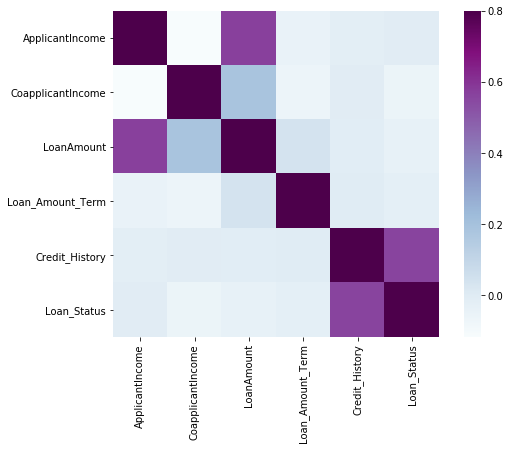

In [81]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [82]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [84]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [86]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [89]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [90]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

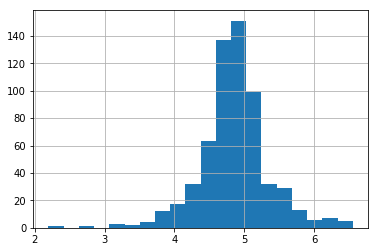

In [92]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [94]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [104]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [105]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X, y, test_size=0.3)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
model = LogisticRegression()
model.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
pred_cv = model.predict(x_cv)

In [112]:
accuracy_score(y_cv, pred_cv)

0.8432432432432433

In [117]:
submission = pd.read_csv('/Users/sunxun/Downloads/Sample_Submission_ZAuTl8O_FK3zQHh.csv')

In [125]:
test.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
LoanAmount_log              5
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3                0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [126]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [127]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [128]:
test.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            6
Credit_History             29
LoanAmount_log              0
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3                0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [130]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [132]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [133]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [134]:
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [135]:
pred_test = model.predict(test)

In [136]:
submission['Loan_Status']=pred_test

In [137]:
submission['Loan_ID']=test_original['Loan_ID']

In [138]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [141]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('/Users/sunxun/Desktop/logistic.csv')

In [143]:
submission.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')